In [1]:
from IPython.display import display, Image
from pprint import pprint
import gv

from ginv import *
sympy.init_printing()

In [2]:
Monom.cmp = Monom.TOPdeglex

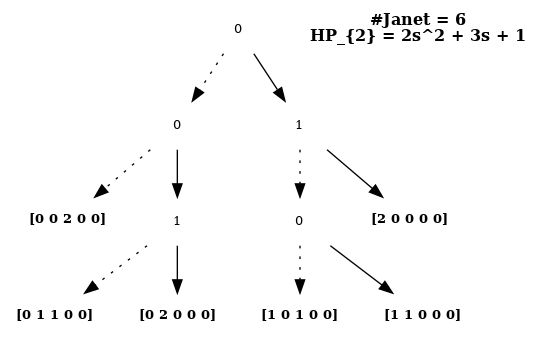

In [3]:
var = ['a', 'b', 'c', 'd', 'e']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))

pommaret = JanetCache()
q = pommaret.insert(Wrap(p) for p in (\
a**2 - b*e,\
a*b - c*e,\
b**2 - d*e,\
a*c - d*e,\
b*c - a*d,\
c**2 - d*b,\
))
assert q == []
pommaret.saveImage('pommaret.png')
Image('./pommaret.png')

In [4]:
assert pommaret.degMinProlong() == 2
q = Q(pommaret.prolongDeg(2))
print(len(q))
assert q.reduceMinDegree(pommaret) == []

8


In [5]:
pommaret.reduction

<bound method Janet.reduction of <janet.JanetCache object at 0x7f3d56a5cc90>>

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2
prolong 4, Q 0
x2*x4**4, x3**3*x4**2
prolong 5, Q 0
x3**2*x4**4
prolong 6, Q 0
prolong 0, Q 0
    crit1: 6
    crit2: 0
     time: 0.02 sec
    count: 7
reduction: 54
       HP: 4s + 6


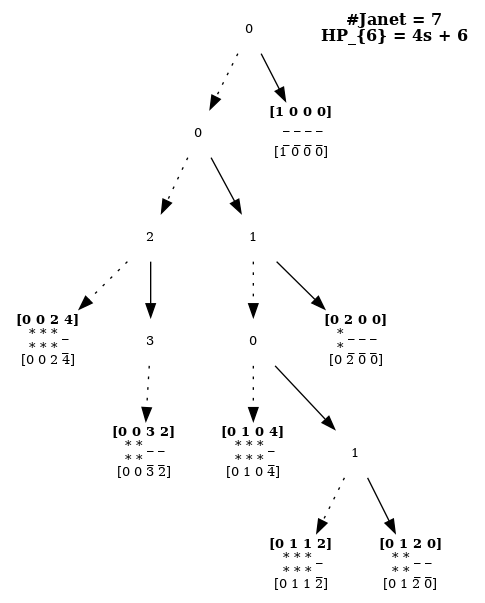

In [6]:
var = ['x1', 'x2', 'x3', 'x4']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic4 = Janet()
res = ginvBlockLow((
x1+x2+x3+x4,\
x1*x2+x2*x3+x3*x4+x4*x1,\
x1*x2*x3+x2*x3*x4+x3*x4*x1+x4*x1*x2,\
x1*x2*x3*x4-1), \
cyclic4, level=1)
print(f"    crit1: {res[1]}")
print(f"    crit2: {res[2]}")
print(f"     time: {res[0]:.2f} sec")
print(f"    count: {cyclic4.count()}")
print(f"reduction: {cyclic4.reduction()}")
print(f"       HP: {cyclic4.HP()}")
cyclic4.saveImage('cyclic4.png', level=3)
Image('./cyclic4.png')

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**3, x3**2*x4**2*x5
prolong 5, Q 0
x2*x4**3*x5**2, x3**3*x5**3, x3*x4**3*x5**2, x3*x4**4*x5, x3**4*x5**2, x2*x4**4*x5
prolong 4, Q 0
x3**4*x4
prolong 5, Q 0
prolong 6, Q 0
x2*x4**2*x5**4, x4**4*x5**3, x3*x4**2*x5**4, x4**3*x5**4, x2*x3*x5**5, x4**5*x5**2
prolong 7, Q 0
x3**3
prolong 3, Q 4
x2*x4**3, x3**2*x4**2
prolong 4, Q 5
x3*x4**3*x5, x3*x4**4, x4**5, x4**4*x5
prolong 5, Q 6
x2*x5**5, x2*x4**2*x5**3, x3*x4**2*x5**3
prolong 6, Q 7
x2*x4*x5**5
prolong 7, Q 7
x3*x4*x5**5, x3**2*x5**5
prolong 7, Q 8
x4**2*x5**6
prolong 8, Q 8
x3*x5**7, x4*x5**7, x5**8, x3**2*x4*x5**5
prolong 8, Q 0
x3*x4**3
prolong 4, Q 5
x4**4
prolong 4, Q 5
prolong 0, Q 0
crit1: 40
crit2: 1
 time: 0.62 sec
    count: 23
reduction: 1375
       HP: 70


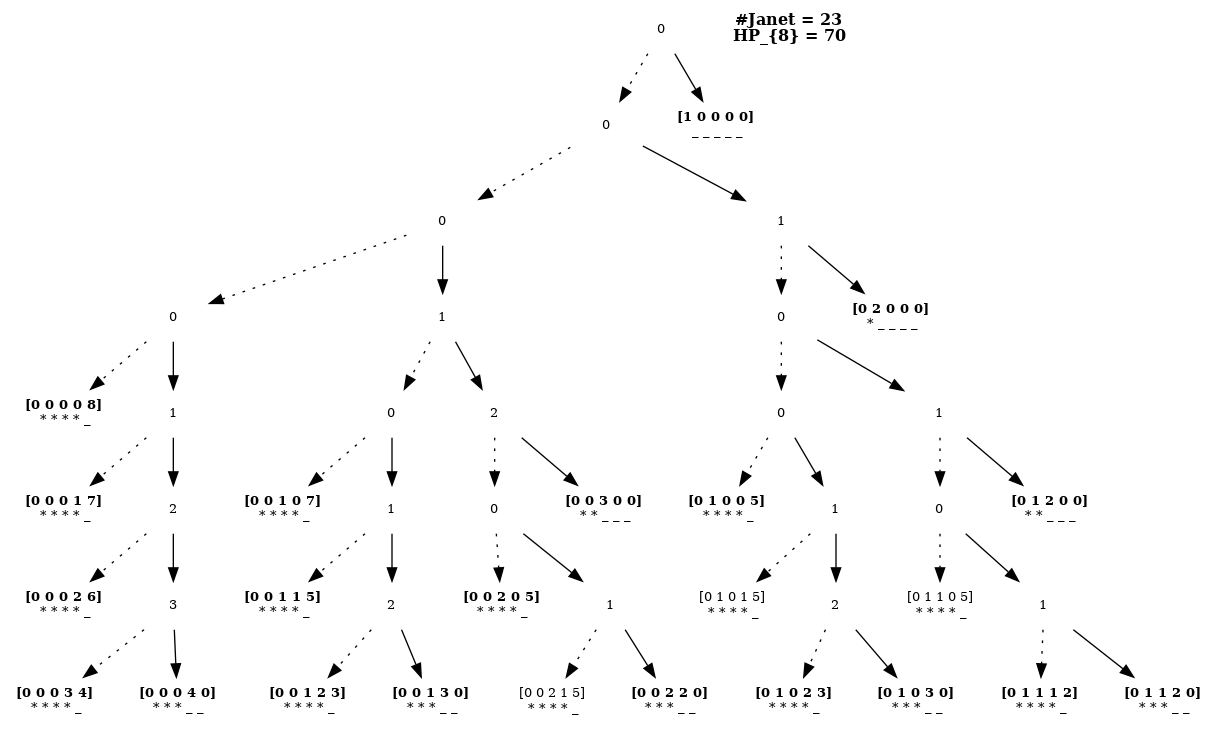

In [7]:
var = ['x1', 'x2', 'x3', 'x4', 'x5']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic5 = Janet()
# cyclic5 = JanetCache()
res = ginvBlockLow((
x1+x2+x3+x4+x5,
x1*x2+x1*x5+x2*x3+x3*x4+x4*x5,
x1*x2*x3+x1*x2*x5+x1*x4*x5+x2*x3*x4+x3*x4*x5,
x1*x2*x3*x4+x1*x2*x3*x5+x1*x2*x4*x5+x1*x3*x4*x5+x2*x3*x4*x5,
x1*x2*x3*x4*x5-1), \
cyclic5, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {cyclic5.count()}")
print(f"reduction: {cyclic5.reduction()}")
print(f"       HP: {cyclic5.HP()}")
cyclic5.saveImage('cyclic5.pdf', level=1)
cyclic5.saveImage('cyclic5.png', level=1)
Image('./cyclic5.png')

In [8]:
for w in cyclic5:
    print(w.poly)

x5**8 + x2*x3*x4*42 + x3**2*x4*21 + x2*x4**2*-165 + x3*x4**2*42 + x4**3*-55 + x2*x3*x5*-76 + x3**2*x5*-55 + x2*x4*x5*13 + x3*x4*x5*-131 + x4**2*x5*-21 + x2*x5**2*186 + x3*x5**2*21 + x4*x5**2*-42 + x5**3*219
x4*x5**7*-1 + x2*x3*x4*110 + x3**2*x4*55 + x2*x4**2*-52 + x3*x4**2*-60 + x4**3*-39 + x2*x3*x5*-29 + x3**2*x5*26 + x2*x4*x5*34 + x3*x4*x5*102 + x4**2*x5*-120 + x2*x5**2*-63 + x3*x5**2*120 + x4*x5**2*-109 + x5**3*26
x4**2*x5**6 + x2*x3*x4*28 + x3**2*x4*14 + x2*x4**2*-21 + x3*x4**2*-12 + x4**3*-12 + x2*x3*x5*-11 + x3**2*x5*3 + x2*x4*x5*9 + x3*x4*x5*17 + x4**2*x5*-30 + x2*x5**2*-5 + x3*x5**2*29 + x4*x5**2*-28 + x5**3*18
x4**3*x5**4*5 + x4**2*x5**5*11 + x3*x5**6*9 + x4*x5**6*2 + x5**7*3 + x2*x3*-10 + x3**2*-10 + x2*x4*10 + x3*x4*-5 + x4**2*4 + x3*x5*-24 + x4*x5*-2 + x5**2*7
x4**4 + x2*x3*x4*x5*14 + x3**2*x4*x5*6 + x2*x4**2*x5*-27 + x3*x4**2*x5*2 + x4**3*x5*-15 + x2*x3*x5**2*-1 + x3**2*x5**2*7 + x2*x4*x5**2*-10 + x3*x4*x5**2*-9 + x4**2*x5**2*-33 + x2*x5**3*24 + x3*x5**3*33 + x4*x5**3*-14 

In [9]:
print(sum(1 for i in cyclic5))
print(sum(1 for i in cyclic5.GB()))
for w in cyclic5.GB():
    print(w.lm, end=", ")

23
20
x5**8, x4*x5**7, x4**2*x5**6, x4**3*x5**4, x4**4, x3*x5**7, x3*x4*x5**5, x3*x4**2*x5**3, x3*x4**3, x3**2*x5**5, x3**2*x4**2, x3**3, x2*x5**5, x2*x4**2*x5**3, x2*x4**3, x2*x3*x4*x5**2, x2*x3*x4**2, x2*x3**2, x2**2, x1, 

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**3, x3**2*x4**2*x5
prolong 5, Q 6
x2*x3*x4*x5*x6**2, x3*x4**2*x5**3, x3*x4**3*x5**2, x3**2*x4*x5**2*x6, x3*x4**3*x5*x6, x3*x4**2*x5**2*x6, x3*x4**4*x5
prolong 6, Q 0
x3**2*x4**2*x6**3, x2*x4**2*x5**2*x6**2, x4**3*x5**2*x6**2, x2*x4*x5**3*x6**2, x3*x4*x5**4*x6, x4**3*x5**3*x6, x2*x4**2*x5**3*x6, x4**2*x5**4*x6, x2*x4*x5**4*x6, x3**4*x5*x6**2, x3**3*x5**2*x6**2, x2*x4**3*x5**2*x6, x4**4*x5**2*x6, x3*x4**4*x6**2
prolong 4, Q 0
x3**4*x4
prolong 5, Q 0
prolong 7, Q 0
x3*x4*x5**3*x6**3, x3*x4**3*x6**4, x2*x3*x5**3*x6**3, x3**2*x5**3*x6**3, x4**2*x5**3*x6**3, x2*x5**4*x6**3, x4*x5**4*x6**3, x3**3*x5*x6**4, x3**2*x4*x5*x6**4, x2*x4**3*x5*x6**3, x2*x4**2*x5*x6**4, x3*x4**2*x5*x6**4, x2*x3*x5**4*x6**2, x3**2*x5**4*x6**2
prolong 8, Q 0
x3**3, x2*x3*x4, x3**2*x4, x2*x4**2
prolong 3, Q 4
x3*x4**2*x5, x3*x4**3, x4**3*x5, x2*x3*x5**2, x3**2*x5**2, x4**4, x2*x4*x5

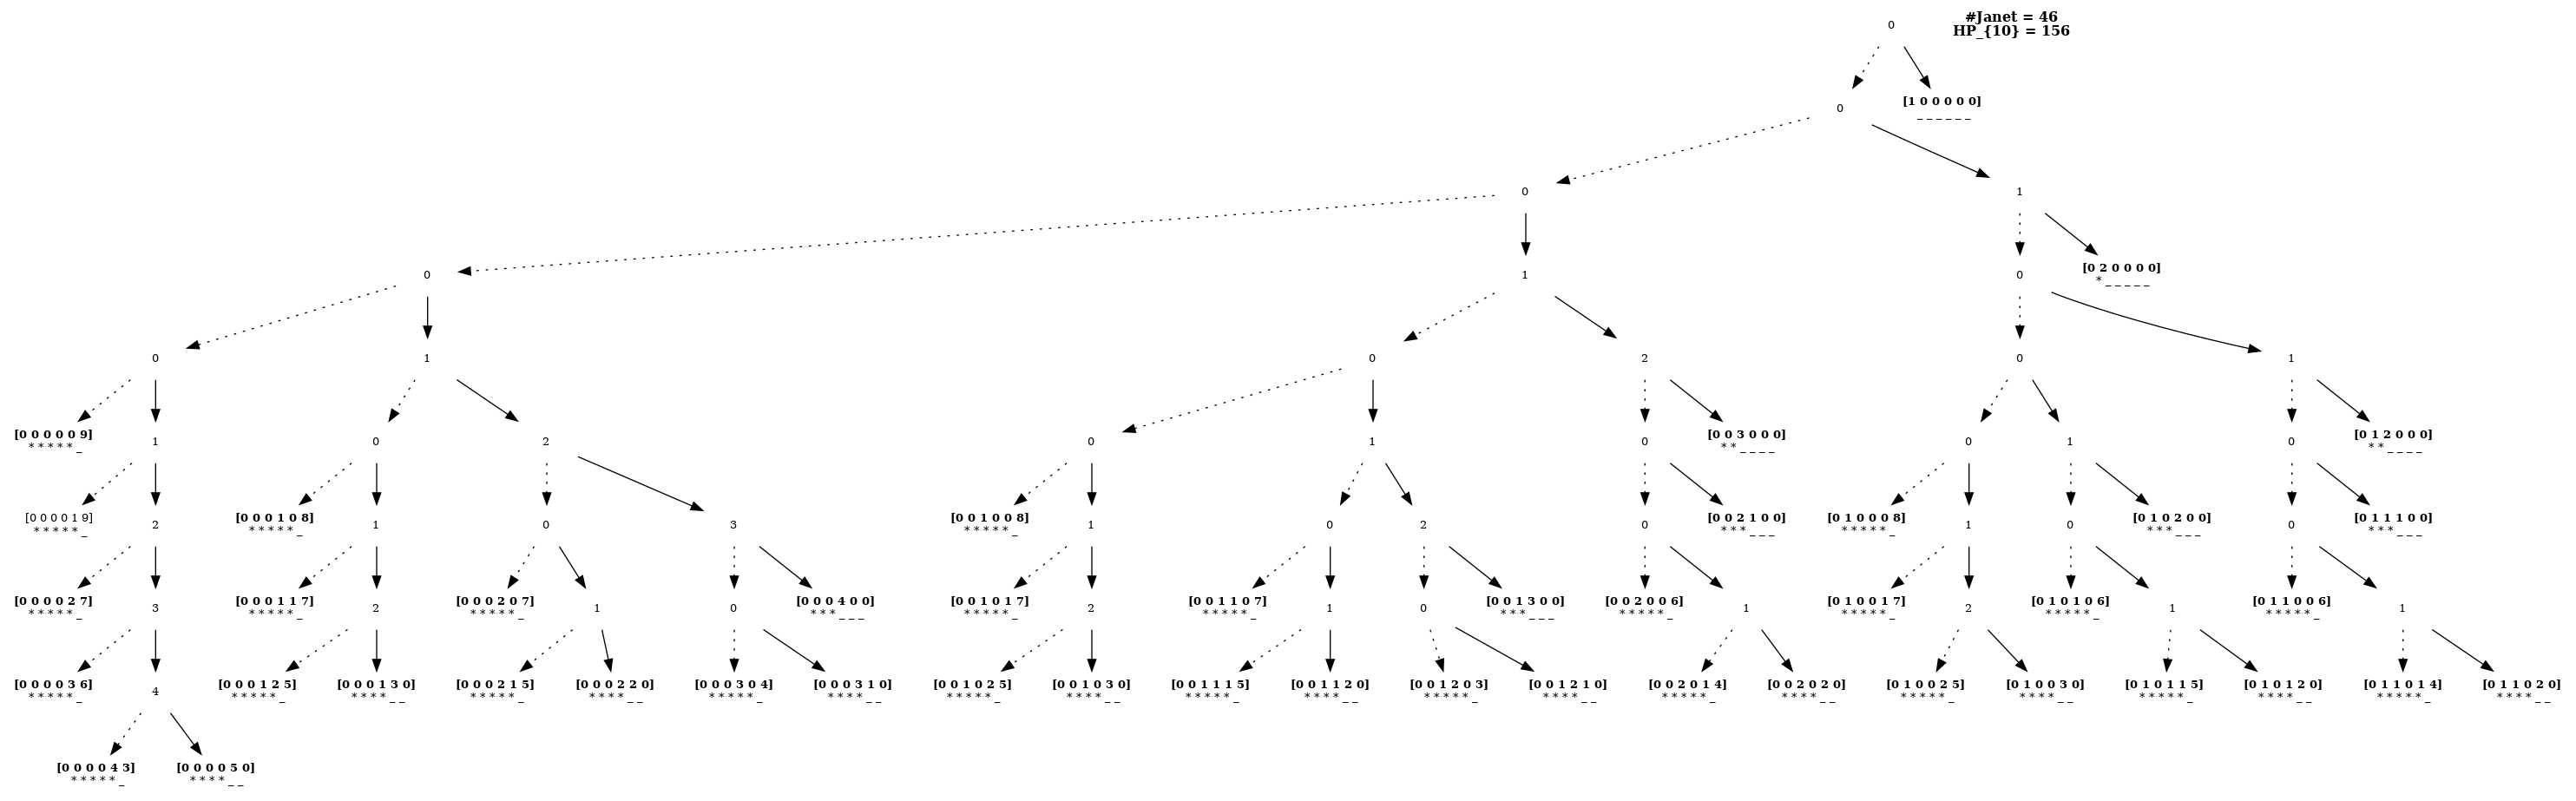

In [10]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic6 = Janet()
# cyclic6 = JanetCache()
res = ginvBlockLow((
x1+x2+x3+x4+x5+x6,
x1*x2+x1*x6+x2*x3+x3*x4+x4*x5+x5*x6,
x1*x2*x3+x1*x2*x6+x1*x5*x6+x2*x3*x4+x3*x4*x5+x4*x5*x6,
x1*x2*x3*x4+x1*x2*x3*x6+x1*x2*x5*x6+x1*x4*x5*x6+x2*x3*x4*x5+x3*x4*x5*x6,
x1*x2*x3*x4*x5+x1*x2*x3*x4*x6+x1*x2*x3*x5*x6+x1*x2*x4*x5*x6+x1*x3*x4*x5*x6+x2*x3*x4*x5*x6,
x1*x2*x3*x4*x5*x6-1), \
cyclic6, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {cyclic6.count()}")
print(f"reduction: {cyclic6.reduction()}")
print(f"       HP: {cyclic6.HP()}")
cyclic6.saveImage('cyclic6.pdf', level=1)
cyclic6.saveImage('cyclic6.png', level=1)
Image('./cyclic6.png')

In [11]:
print(sum(1 for i in cyclic6))
print(sum(1 for i in cyclic6.GB()))

46
45


prolong 0, Q 3
z**3
prolong 0, Q 3
y**3
prolong 3, Q 3
x**3
prolong 3, Q 0
y*z**3
prolong 4, Q 4
x*z**3
prolong 4, Q 4
x*y**3
prolong 4, Q 0
y**2*z**3
prolong 5, Q 5
x*y*z**3
prolong 5, Q 5
x**2*z**3
prolong 5, Q 5
x**2*y**3
prolong 5, Q 0
x*y**2*z**3
prolong 6, Q 6
x**2*y*z**3
prolong 6, Q 6
prolong 6, Q 0
x**2*y**2*z**3
prolong 7, Q 7
prolong 7, Q 0
prolong 0, Q 0
crit1: 7
crit1: 4
 time: 0.01 sec
    count: 13
reduction: 19
       HP: 27


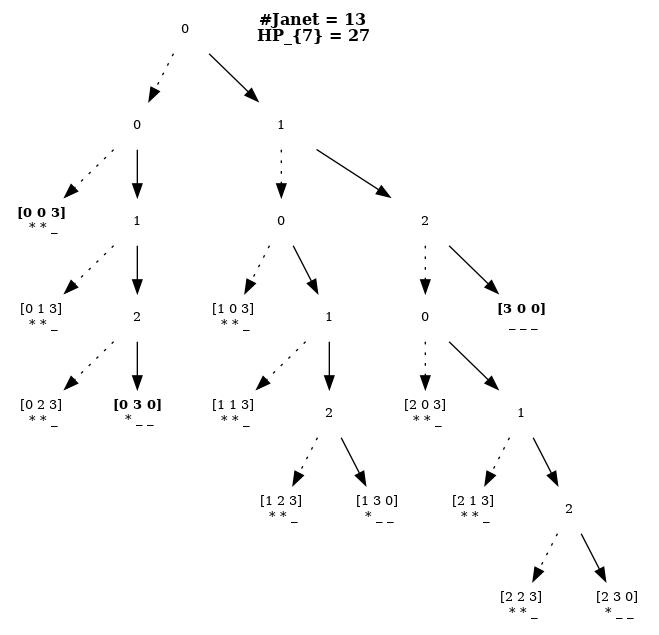

In [12]:
var = ['x', 'y', 'z']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvBlockLow((
x**3 - y**2 + z - 1,
y**3 - z**2 + x - 2,
z**3 - x**2 + y - 3), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [13]:
print(sum(1 for i in test))
print(sum(1 for i in test.GB()))

13
3


In [14]:
for w in test:
    print(w.poly)

z**3 + x**2*-1 + y + -3
y*z**3 + x**2*y*-1 + y**2 + y*-3
y**2*z**3 + x**2*y**2*-1 + y**2*-3 + z**2 + x*-1 + 2
y**3 + z**2*-1 + x + -2
x*z**3 + x*y + y**2*-1 + x*-3 + z + -1
x*y*z**3 + x*y**2 + x*y*-3 + y*z + z**2*-1 + x + y*-1 + -2
x*y**2*z**3 + x*y**2*-3 + y**2*z + x*z**2 + y*z**2*-1 + x**2*-1 + x*y + y**2*-1 + x*2 + y*-2
x*y**3 + x*z**2*-1 + x**2 + x*-2
x**2*z**3 + x**2*y + x*y**2*-1 + x**2*-3 + x*z + x*-1
x**2*y*z**3 + x**2*y**2 + x**2*y*-3 + x*y*z + x*z**2*-1 + x**2 + x*y*-1 + x*-2
x**2*y**2*z**3 + x**2*y**2*-3 + x*y**2*z + x**2*z**2 + x*y*z**2*-1 + x**2*y + x*y**2*-1 + x**2*2 + x*y*-2 + y**2*-1 + z + -1
x**2*y**3 + x**2*z**2*-1 + x**2*-2 + y**2 + z*-1 + 1
x**3 + y**2*-1 + z + -1


In [15]:
for w in test.GB():
    print(w.poly)

z**3 + x**2*-1 + y + -3
y**3 + z**2*-1 + x + -2
x**3 + y**2*-1 + z + -1


In [16]:
rows, i = {}, 0
for d in range(8):
    for m in Monom.gradus(d):
        if not test.find(m):
            print(f"{m!r}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число корней с учетом кратности: {len(rows)}")

[0 0 0], 
[1 0 0], [0 1 0], [0 0 1], 
[2 0 0], [1 1 0], [1 0 1], [0 2 0], [0 1 1], [0 0 2], 
[2 1 0], [2 0 1], [1 2 0], [1 1 1], [1 0 2], [0 2 1], [0 1 2], 
[2 2 0], [2 1 1], [2 0 2], [1 2 1], [1 1 2], [0 2 2], 
[2 2 1], [2 1 2], [1 2 2], 
[2 2 2], 

число корней с учетом кратности: 27


In [17]:
(x**9).NF(test)

[[[0 2 2], 3],
 [[2 1 0], -3],
 [[2 0 1], 1],
 [[1 1 1], 3],
 [[0 2 1], -6],
 [[1 0 2], -2],
 [[0 1 2], 3],
 [[1 1 0], -3],
 [[0 2 0], 6],
 [[0 1 1], -7],
 [[0 0 2], 7],
 [[1 0 0], -4],
 [[0 1 0], -2],
 [[0 0 0], 2]]

In [18]:
A = [[0 for k in range(27)] for i in range(27)]
for d in range(27):
    for m, c in (x**d).NF(test):
        A[rows[m]][d] = c

In [19]:
A[0]

In [20]:
b = [0 for i in range(27)]
for m, c in (x**27).NF(test):
    b[rows[m]] = c

In [21]:
b

In [22]:
A, b = sympy.Matrix(A), sympy.Matrix(b)

In [23]:
s = sympy.linsolve((A, b))
s

In [24]:
s = s.args[0]
p = Poly(Monom((27, 0, 0))) - sum(Poly(Monom((d, 0, 0)))*s[d] for d in range(27) if s[d])
print(p)

x**27 + x**24*-9 + x**21*29 + x**19*12 + x**18*-56 + x**17*40 + x**16*-135 + x**15*203 + x**14*-311 + x**13*514 + x**12*-953 + x**11*1062 + x**10*-1319 + x**9*2992 + x**8*-2395 + x**7*3450 + x**6*-5886 + x**5*4067 + x**4*-5795 + x**3*7006 + x**2*-3316 + x*3768 + -3600


In [25]:
p.NF(test)

[]

In [26]:
x = sympy.symbols('x')
sol1 = sympy.nroots(x**27 + x**24*-9 + x**21*29 + x**19*12 + x**18*-56 
+ x**17*40 + x**16*-135 + x**15*203 + x**14*-311 + x**13*514 + x**12*-953 
+ x**11*1062 + x**10*-1319 + x**9*2992 + x**8*-2395 + x**7*3450 
+ x**6*-5886 + x**5*4067 + x**4*-5795 + x**3*7006 + x**2*-3316 + x*3768 + -3600)
for s in sol1:
    print(s)

1.16806505363572
-1.52199063063865 - 0.472367880942079*I
-1.52199063063865 + 0.472367880942079*I
-1.13465546036359 - 0.719984405712257*I
-1.13465546036359 + 0.719984405712257*I
-0.926923594142734 - 1.38896134800554*I
-0.926923594142734 + 1.38896134800554*I
-0.781159943875429 - 1.07128968143714*I
-0.781159943875429 + 1.07128968143714*I
-0.594189223657336 - 1.19894213896259*I
-0.594189223657336 + 1.19894213896259*I
-0.462799712104723 - 1.12248350526833*I
-0.462799712104723 + 1.12248350526833*I
-0.44915808581763 - 1.37356741601555*I
-0.44915808581763 + 1.37356741601555*I
0.0686714903722352 - 1.15836203522044*I
0.0686714903722352 + 1.15836203522044*I
0.404926805269033 - 1.29265863189902*I
0.404926805269033 + 1.29265863189902*I
0.923086188555943 - 0.991773946487541*I
0.923086188555943 + 0.991773946487541*I
0.931900786639237 - 0.405019715427683*I
0.931900786639237 + 0.405019715427683*I
1.43661337711015 - 0.479544062400908*I
1.43661337711015 + 0.479544062400908*I
1.52164547583563 - 0.00725529

In [27]:
from sympy.matrices.sparsetools import _doktocsr
from sympy import SparseMatrix

In [28]:
dct = [{}, {}, {}]
for k, v in rows.items():
    for i in range(3):
        for m, c in Poly(Monom(i)*k).NF(test):
            if c:
                dct[i][rows[m], v] = c

In [29]:
X = [SparseMatrix(27, 27, dct[i]) for i in range(3)]

In [30]:
X[0]*X[1] == X[1]*X[0] and X[0]*X[2] == X[2]*X[0] and X[2]*X[1] == X[1]*X[2]

True

In [31]:
print(len(_doktocsr(X[0])[0]), 27**2, len(_doktocsr(X[0])[0])/27**2)

73 729 0.10013717421124829


In [32]:
_doktocsr(X[0])

In [33]:
X765 = sympy.Matrix([[0 for k in range(27)] for i in range(27)])
for k, v in rows.items():
    for m, c in Poly(Monom((7, 6, 5))*k).NF(test):
        X765[rows[m], v] = c

In [34]:
X765 == X[1]**5*X[0]**7*X[2]**5*X[1]

True

In [35]:
sympy.zeros(27, 27) == X[0]**27 + X[0]**24*-9 + X[0]**21*29 + X[0]**19*12 + X[0]**18*-56\
+ X[0]**17*40 + X[0]**16*-135 + X[0]**15*203 + X[0]**14*-311\
+ X[0]**13*514 + X[0]**12*-953 + X[0]**11*1062 + X[0]**10*-1319\
+ X[0]**9*2992 + X[0]**8*-2395 + X[0]**7*3450 + X[0]**6*-5886\
+ X[0]**5*4067 + X[0]**4*-5795 + X[0]**3*7006 + X[0]**2*-3316 + X[0]*3768 + sympy.eye(27)*-3600

True

In [36]:
for i in range(3):
    print(f"det(X[{i}]) = {X[i].det()}")

det(X[0]) = 3600
det(X[1]) = 15407
det(X[2]) = 23905


In [37]:
import numpy as np
from scipy import linalg

In [38]:
for i in range(3):
    A = np.empty((27, 27), dtype=np.float64)
    for j in range(27):
        for k in range(27):
            A[j][k] = X[i][j, k]
    pprint(linalg.eigvals(A))

array([-1.52199063+0.47236788j, -1.52199063-0.47236788j,
       -1.13465546+0.71998441j, -1.13465546-0.71998441j,
       -0.92692359+1.38896135j, -0.92692359-1.38896135j,
       -0.78115994+1.07128968j, -0.78115994-1.07128968j,
       -0.44915809+1.37356742j, -0.44915809-1.37356742j,
       -0.59418922+1.19894214j, -0.59418922-1.19894214j,
       -0.46279971+1.12248351j, -0.46279971-1.12248351j,
        0.40492681+1.29265863j,  0.40492681-1.29265863j,
        0.06867149+1.15836204j,  0.06867149-1.15836204j,
        0.92308619+0.99177395j,  0.92308619-0.99177395j,
        1.43661338+0.47954406j,  1.43661338-0.47954406j,
        0.93190079+0.40501972j,  0.93190079-0.40501972j,
        1.52164548+0.0072553j ,  1.52164548-0.0072553j ,
        1.16806505+0.j        ])
array([-0.98229265+1.62689646j, -0.98229265-1.62689646j,
       -1.37520861+0.60158378j, -1.37520861-0.60158378j,
       -1.16658632+0.90968529j, -1.16658632-0.90968529j,
       -0.86174064+1.05517497j, -0.86174064-1.05517497j

In [39]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
fun = []
Monom.init(var, fun)

In [40]:
%%time
rows, i = {}, 0
for d in range(10):
    for m in Monom.gradus(d):
        if not cyclic6.find(m):
            print(f"{m!r}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число корней с учетом кратности: {len(rows)}")

[0 0 0 0 0 0], 
[0 1 0 0 0 0], [0 0 1 0 0 0], [0 0 0 1 0 0], [0 0 0 0 1 0], [0 0 0 0 0 1], 
[0 1 1 0 0 0], [0 1 0 1 0 0], [0 1 0 0 1 0], [0 1 0 0 0 1], [0 0 2 0 0 0], [0 0 1 1 0 0], [0 0 1 0 1 0], [0 0 1 0 0 1], [0 0 0 2 0 0], [0 0 0 1 1 0], [0 0 0 1 0 1], [0 0 0 0 2 0], [0 0 0 0 1 1], [0 0 0 0 0 2], 
[0 1 1 0 1 0], [0 1 1 0 0 1], [0 1 0 1 1 0], [0 1 0 1 0 1], [0 1 0 0 2 0], [0 1 0 0 1 1], [0 1 0 0 0 2], [0 0 2 0 1 0], [0 0 2 0 0 1], [0 0 1 2 0 0], [0 0 1 1 1 0], [0 0 1 1 0 1], [0 0 1 0 2 0], [0 0 1 0 1 1], [0 0 1 0 0 2], [0 0 0 3 0 0], [0 0 0 2 1 0], [0 0 0 2 0 1], [0 0 0 1 2 0], [0 0 0 1 1 1], [0 0 0 1 0 2], [0 0 0 0 3 0], [0 0 0 0 2 1], [0 0 0 0 1 2], [0 0 0 0 0 3], 
[0 1 1 0 1 1], [0 1 1 0 0 2], [0 1 0 1 1 1], [0 1 0 1 0 2], [0 1 0 0 2 1], [0 1 0 0 1 2], [0 1 0 0 0 3], [0 0 2 0 1 1], [0 0 2 0 0 2], [0 0 1 2 0 1], [0 0 1 1 1 1], [0 0 1 1 0 2], [0 0 1 0 2 1], [0 0 1 0 1 2], [0 0 1 0 0 3], [0 0 0 3 0 1], [0 0 0 2 1 1], [0 0 0 2 0 2], [0 0 0 1 2 1], [0 0 0 1 1 2], [0 0 0 1 0 3], [0 0 0

In [41]:
%%time
dct = [{} for i in range(6)]
for k, v in rows.items():
    for i in range(6):
        for m, c in Poly(Monom(i)*k).NF(cyclic6):
            if c:
                dct[i][rows[m], v] = c
print([len(dct[i]) for i in range(6)], 156*156)

[2789, 2728, 2548, 2406, 1952, 799] 24336
CPU times: user 3.79 s, sys: 19.9 ms, total: 3.81 s
Wall time: 3.81 s


In [42]:
%%time
for i in range(6):
    A = np.empty((156, 156), dtype=np.float64)
    d = dct[i]
    for j in range(156):
        for k in range(156):
            A[j][k] = d.get((j, k), 0.)
    pprint(linalg.eigvals(A))

array([ 3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j, -3.73205081e+00+0.00000000e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j,  3.73205081e+00+0.00000000e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -2.14064877e-15+2.29663026e+00j, -2.14064877e-15-2.29663026e+00j,
       -1.55431223e-15+2.29663026e+00j, -1.55431223e-15-2.29663026e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
       -9.30604859e-01+3.66025404e-01j, -9.30604859e-01-3.66025404e-01j,
       -1.48315131e-01+9.88940151e-01j, -1.48315131

array([-3.73205081e+00+0.00000000e+00j, -3.73205081e+00+0.00000000e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
        3.73205081e+00+0.00000000e+00j,  3.73205081e+00+0.00000000e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        4.84473572e-14+2.29663026e+00j,  4.84473572e-14-2.29663026e+00j,
       -9.04831765e-15+2.29663026e+00j, -9.04831765e-15-2.29663026e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.48315131e-01+9.88940151e-01j, -1.48315131e-01-9.88940151e-01j,
        1.48315131e-01+9.88940151e-01j,  1.48315131

array([ 3.73205081e+00+0.00000000e+00j, -3.73205081e+00+0.00000000e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -3.73205081e+00+0.00000000e+00j,  3.73205081e+00+0.00000000e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
       -1.19348975e-15+2.29663026e+00j, -1.19348975e-15-2.29663026e+00j,
       -1.33226763e-15+2.29663026e+00j, -1.33226763e-15-2.29663026e+00j,
        9.30604859e-01+3.66025404e-01j,  9.30604859e-01-3.66025404e-01j,
        9.30604859e-01+3.66025404e-01j,  9.30604859

https://link.springer.com/article/10.1007/BF01782361
<img src="Zum Hilbertschen Nullstellensatz.png">

prolong <= x**3
x**3
prolong <= y**3
y**3
prolong <= k*y
y*x**3
prolong <= k*y
y**2*x**3
prolong <= k*y
k*y
prolongAll
k*y**3
k*x**3
prolong <= k*x**3
k*x**3
y**2
prolong <= y**2*x**3
y**3
prolongAll
k*y**2
k*x**2
prolong <= k*x**3
k*x**3
k*x
prolong <= k*x**2
k*x**2
k
prolong <= k*x
k*x
k*y
prolongAll
crit1: 5
crit1: 0
 time: 0.02 sec
    count: 4
reduction: 34
       HP: 6


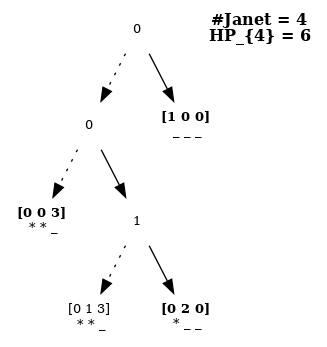

In [43]:
Monom.cmp = Monom.POTlex
var = ['k', 'y', 'x']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvMin((
x*(x+1)*(x-1),
y*(y+1)*(y-1),
(x - y)*k - 1,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [44]:
for w in test.GB():
    print(w.poly)

x**3 + x*-1
y**2*-1 + y*x*-1 + x**2*-1 + 1
k*2 + y*x**2*-3 + y*2 + x*-2


In [45]:
for w in test.GB():
    print(str(w.poly).replace('x', 'x{v}').replace('y', 'x{w}'))

x{v}**3 + x{v}*-1
x{w}**2*-1 + x{w}*x{v}*-1 + x{v}**2*-1 + 1
k*2 + x{w}*x{v}**2*-3 + x{w}*2 + x{v}*-2


prolong <= x**4
x**4
prolong <= y**4
y**4
prolong <= k*y
y*x**4
prolong <= k*y
y**2*x**4
prolong <= k*y
y**3*x**4
prolong <= k*y
k*y
prolongAll
k*y**4
k*x**4
prolong <= k*x**4
k*x**4
y**3
prolong <= y**3*x**4
y**4
prolongAll
k*y**3
k*x**3
prolong <= k*x**4
k*x**4
k*x**2
prolong <= k*x**3
k*x**3
k*x
prolong <= k*x**2
k*x**2
k
prolong <= k*x
k*x
k*y
prolongAll
crit1: 6
crit1: 0
 time: 0.03 sec
    count: 5
reduction: 62
       HP: 12


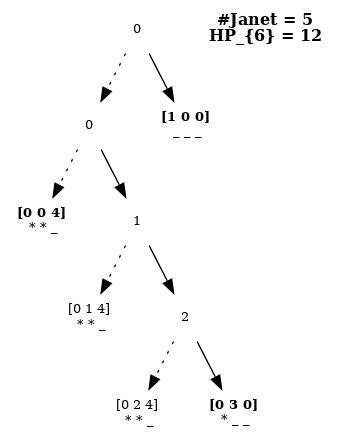

In [46]:
Monom.cmp = Monom.POTlex
var = ['k', 'y', 'x']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvMin((
x*(x+1)*(x-1)*(x-2),
y*(y+1)*(y-1)*(y-2),
(x - y)*k -1), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [47]:
for w in test.GB():
    print(w.poly)

x**4 + x**3*-2 + x**2*-1 + x*2
y**3*-1 + y**2*x*-1 + y**2*2 + y*x**2*-1 + y*x*2 + y + x**3*-1 + x**2*2 + x + -2
k*18 + y**2*x**3*-10 + y**2*x**2*15 + y**2*x*13 + y**2*-9 + y*x**3*10 + y*x**2*-24 + y*x*-4 + y*18 + x**3*9 + x**2*-9 + x*-27 + 9


In [48]:
for w in test.GB():
    print(str(w.poly).replace('x', 'x{v}').replace('y', 'x{w}'))

x{v}**4 + x{v}**3*-2 + x{v}**2*-1 + x{v}*2
x{w}**3*-1 + x{w}**2*x{v}*-1 + x{w}**2*2 + x{w}*x{v}**2*-1 + x{w}*x{v}*2 + x{w} + x{v}**3*-1 + x{v}**2*2 + x{v} + -2
k*18 + x{w}**2*x{v}**3*-10 + x{w}**2*x{v}**2*15 + x{w}**2*x{v}*13 + x{w}**2*-9 + x{w}*x{v}**3*10 + x{w}*x{v}**2*-24 + x{w}*x{v}*-4 + x{w}*18 + x{v}**3*9 + x{v}**2*-9 + x{v}*-27 + 9


C. Y. Chao and Z. Chen, On uniquely 3-colorable graphs, Discrete Math. 112 (1993), 21–27
![image info](./3-Figure2-1.png)

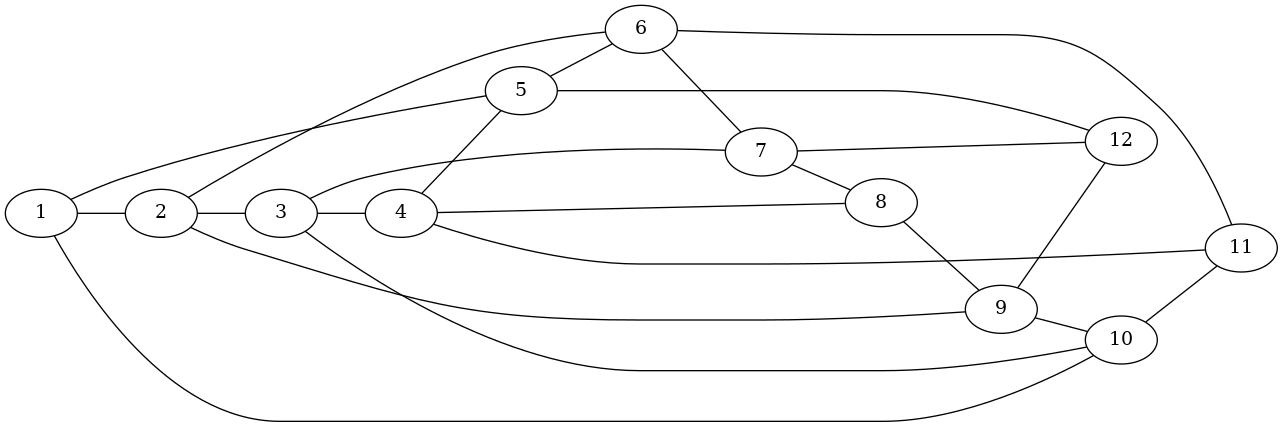

In [49]:
graph = (
(1, 2, 5, 10),\
(2, 3, 6, 9),\
(3, 4, 7, 10),\
(4, 5, 8, 11),\
(5, 6, 12),\
(6, 7, 11),\
(7, 8, 12),\
(8, 9),\
(9, 10, 12),\
(10, 11),\
)

g, edge = gv.graph('grey'), {}
gv.setv(g, 'rankdir', 'LR')
for vs in graph:
    a = gv.node(g, str(vs[0]))
    if vs[0] not in edge: edge[vs[0]] = a
    for v in vs[1:]:
        if v not in edge: edge[v] = gv.node(g, str(v))
        gv.edge(a, edge[v])
gv.layout(g, 'dot')
gv.render(g, "png", 'grey.png')
Image('grey.png')

prolong 0, Q 2
x10**2
prolong 0, Q 2
x9**2
prolong 2, Q 2
x9*x10, x8**2, x7**2, x7*x8, x6**2, x6*x7, x5**2, x5*x6, x4**2, x4*x5, x4*x8, x3**2, x3*x4, x3*x7, x2**2, x2*x3, x2*x6, x1**2, x1*x2, x1*x5
prolong 2, Q 3
x12**3
prolong 3, Q 3
x11**3
prolong 3, Q 3
x9*x11**2, x6*x11**2, x5*x11**2, x4*x11**2, x3*x10*x11, x1*x10*x11, x4*x9*x11, x2*x9*x11, x4*x7*x11, x8*x9*x11, x8*x10**2, x7*x10**2, x6*x10**2, x5*x10**2, x4*x10**2, x3*x10**2, x2*x10**2, x1*x10**2, x8*x9*x10, x7*x9*x10, x6*x9*x10, x5*x9*x10, x4*x9*x10, x3*x9*x10, x2*x9*x10, x1*x9*x10, x3*x6*x10, x6*x9*x11, x1*x6*x10, x5*x10*x11, x3*x5*x10, x1*x4*x10, x8*x9**2, x7*x9**2, x6*x9**2, x5*x9**2, x4*x9**2, x3*x9**2, x2*x9**2, x1*x9**2, x6*x8*x9, x5*x8*x9, x3*x8*x9, x2*x7*x9, x2*x5*x9, x2*x4*x9, x6*x8**2, x5*x8**2, x3*x8**2, x2*x8**2, x1*x8**2, x5*x7*x8, x2*x7*x8, x1*x7*x8, x2*x4*x8, x1*x4*x8, x5*x7**2, x4*x7**2, x2*x7**2, x1*x7**2, x4*x6*x7, x1*x6*x7, x1*x3*x7, x4*x6**2, x3*x6**2, x1*x6**2, x3*x5*x6, x3*x5**2, x2*x5**2, x2*x4*x5, x2*x4**2

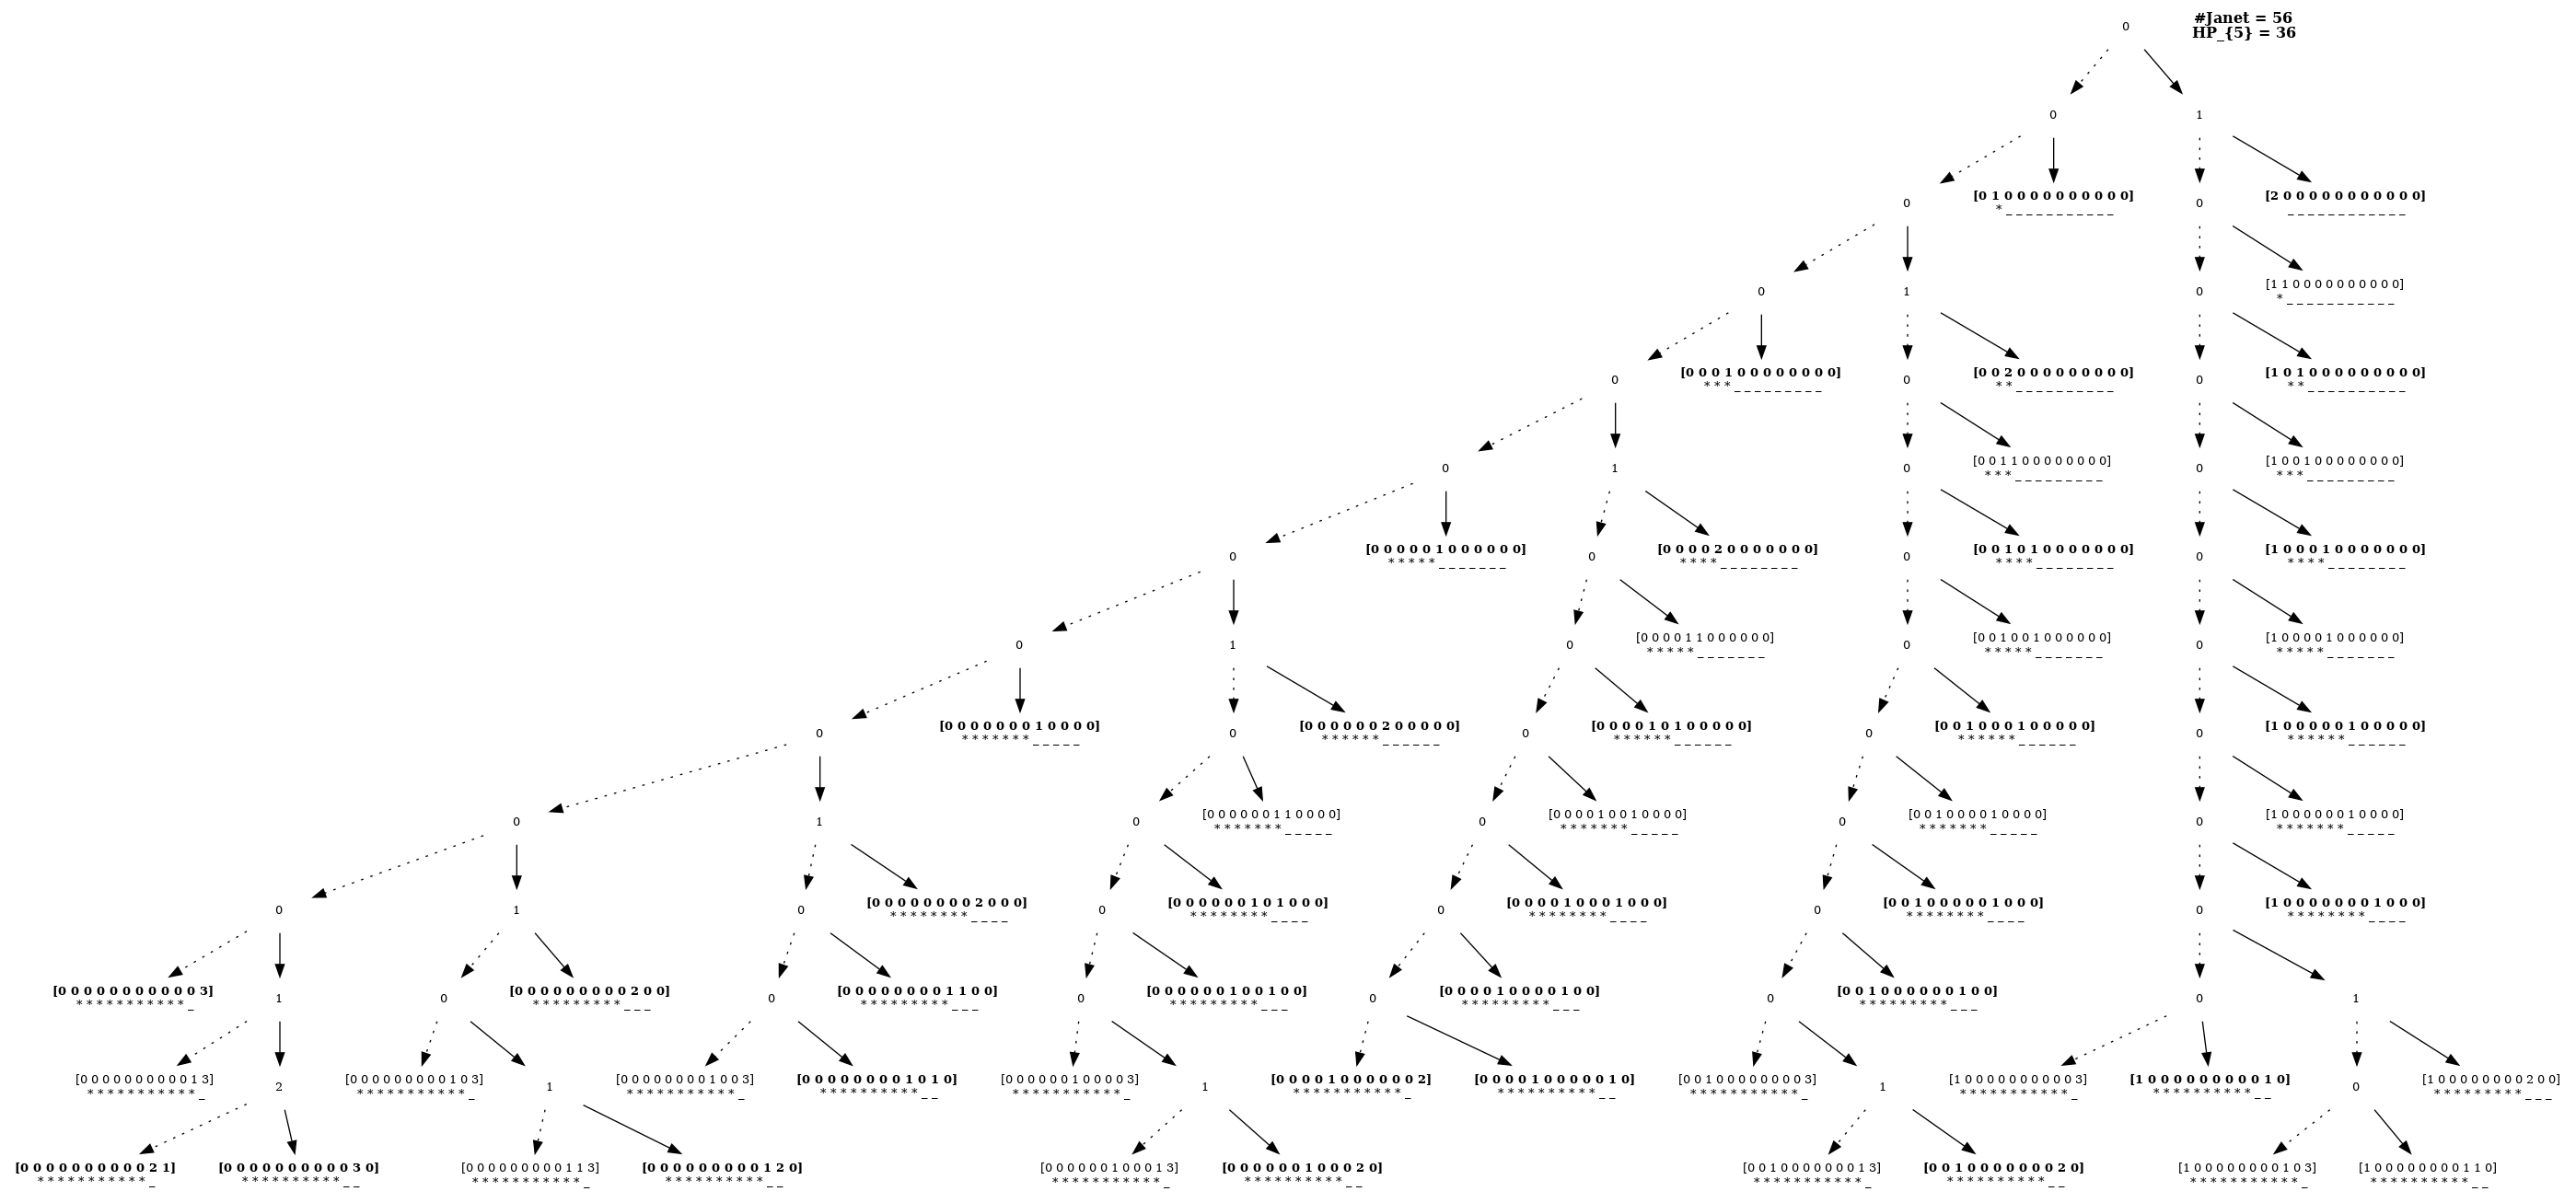

In [50]:
Monom.cmp = Monom.TOPdeglex
var = [f"x{vs}" for vs in range(1, 13)]
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
lst = [eval(f"{v}**3 + {v}*-1") for v in var]
# lst = [eval(f"{v}**4 + {v}**3*-2 + {v}**2*-1 + {v}*2") for v in var]
for vs in graph:
    w = vs[0]
    for v in vs[1:]:
        lst.append(eval(f"x{w}**2*-1 + x{w}*x{v}*-1 + x{v}**2*-1 + 1"))
#         lst.append(eval(f"""x{w}**3*-1 + x{w}**2*x{v}*-1 + x{w}**2*2\
# + x{w}*x{v}**2*-1 + x{w}*x{v}*2 + x{w} + x{v}**3*-1 + x{v}**2*2 + x{v} + -2"""))
res = ginvBlockLow(lst, test, level=1)
# res = ginvMin(lst, test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [51]:
for w in test.GB():
    print(w.poly)

x12**3 + x12*-1
x11**2*x12*-3 + x11*x12**2*-3 + x5*-2 + x9*-2 + x11*4
x11**3 + x11*-1
x10*x11**2*-3 + x10*x11*x12*-3 + x9*x12**2*-9 + x10*x12**2*-3 + x11*x12**2*9 + x5*4 + x9*7 + x10*3 + x11*-11
x10**2*-1 + x10*x11*-1 + x11**2*-1 + 1
x9*x11*-1 + x11**2 + x9*x12 + x11*x12*-1
x9*x10 + x10*x11*-1 + x11**2*-1 + x9*x12*-1 + x12**2*-1 + 1
x9**2 + x9*x12 + x12**2 + -1
x8 + x9 + x10
x7*x11**2*3 + x7*x11*x12*3 + x7*x12**2*3 + x9*x12**2*9 + x11*x12**2*-9 + x5*-4 + x7*-3 + x9*-7 + x11*11
x7*x10 + x7*x11 + x10*x11*-1 + x7*x12 + x12**2 + -1
x7*x9*-1 + x7*x11 + x11**2 + x9*x12 + x12**2 + -1
x7**2 + x7*x12 + x12**2 + -1
x6*-1 + x10*-1 + x11*-1
x5*x12**2 + x9*x12**2 + x11*x12**2*-2 + x5*-1 + x9*-1 + x11*2
x5*x11*-1 + x11**2 + x5*x12 + x11*x12*-1
x5*x10 + x10*x11*-1 + x11**2 + x5*x12*2 + x11*x12*-1 + x12**2 + -1
x5*x9 + x11**2*-2 + x5*x12*-1 + x9*x12*-1 + x11*x12 + x12**2*-1 + 1
x5*x7*-1 + x7*x11 + x11**2*-1 + x5*x12*-2 + x11*x12 + x12**2*-1 + 1
x5**2 + x5*x12 + x12**2 + -1
x4*-1 + x5*-1 + x9 + x10
x3*

In [52]:
lst1 = [w.poly for w in test.GB()]
test1 = Janet()
lst1.append(x12)
res = ginvBlockLow(lst1, test1, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test1.HP()}")
for w in test1.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x8
prolong 1, Q 1
x6
prolong 1, Q 1
x4
prolong 1, Q 1
x2
prolong 1, Q 2
x9*x11
prolong 1, Q 2
x9*x12
prolong 2, Q 2
x5*x11
prolong 1, Q 2
x5*x12
prolong 2, Q 2
x1*x11
prolong 1, Q 2
x1*x12
prolong 2, Q 2
x10**2
prolong 1, Q 2
x10*x12
prolong 2, Q 2
x9*x10
prolong 2, Q 2
x7*x10
prolong 1, Q 2
x7*x12
prolong 2, Q 2
x5*x10
prolong 2, Q 2
x3*x10
prolong 1, Q 2
x3*x12
prolong 2, Q 2
x9**2
prolong 2, Q 2
x7*x9
prolong 2, Q 2
x5*x9
prolong 2, Q 2
x3*x9
prolong 2, Q 2
x1*x9
prolong 2, Q 2
x7*x8
prolong 2, Q 2
x5*x8
prolong 2, Q 2
x3*x8
prolong 2, Q 2
x1*x8
prolong 2, Q 2
x7**2
prolong 2, Q 2
x5*x7
prolong 2, Q 2
x3*x7
prolong 2, Q 2
x1*x7
prolong 2, Q 2
x5*x6
prolong 2, Q 2
x3*x6
prolong 2, Q 2
x1*x6
prolong 2, Q 2
x5**2
prolong 2, Q 2
x3*x5
prolong 2, Q 2
x1*x5
prolong 2, Q 2
x3*x4
prolong 2, Q 2
x1*x4
prolong 2, Q 2
x3**2
prolong 2, Q 2
x1*x3
prolong 2, Q 2
x1*x2
prolong 2, Q 2
x1**2
prolong 2, Q 3
x5
prolong 1, Q 2
x11**3
prolong 1, Q 3
x11*x12
prolong 2, Q

In [53]:
lst2 = [w.poly for w in test1.GB()]
test2 = Janet()
lst2.append(x11)
res = ginvBlockLow(lst2, test2, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test2.HP()}")
for w in test2.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x11
prolong 1, Q 1
x8
prolong 1, Q 1
x6
prolong 1, Q 1
x5
prolong 1, Q 1
x4
prolong 1, Q 1
x2
prolong 1, Q 2
x10**2
prolong 1, Q 2
x10*x12
prolong 2, Q 2
x10*x11
prolong 2, Q 2
x9*x10
prolong 1, Q 2
x9*x12
prolong 2, Q 2
x9*x11
prolong 2, Q 2
x7*x10
prolong 1, Q 2
x7*x12
prolong 2, Q 2
x7*x11
prolong 2, Q 2
x3*x10
prolong 1, Q 2
x3*x12
prolong 2, Q 2
x3*x11
prolong 2, Q 2
x9**2
prolong 2, Q 2
x7*x9
prolong 2, Q 2
x3*x9
prolong 2, Q 2
x1*x9
prolong 1, Q 2
x1*x12
prolong 2, Q 2
x1*x11
prolong 2, Q 2
x7*x8
prolong 2, Q 2
x3*x8
prolong 2, Q 2
x1*x8
prolong 2, Q 2
x7**2
prolong 2, Q 2
x3*x7
prolong 2, Q 2
x1*x7
prolong 2, Q 2
x3*x6
prolong 2, Q 2
x1*x6
prolong 2, Q 2
x3*x5
prolong 2, Q 2
x1*x5
prolong 2, Q 2
x3*x4
prolong 2, Q 2
x1*x4
prolong 2, Q 2
x3**2
prolong 2, Q 2
x1*x3
prolong 2, Q 2
x1*x2
prolong 2, Q 2
x1**2
prolong 2, Q 3
x9
prolong 1, Q 2
x7
prolong 1, Q 2
x3
prolong 1, Q 2
x1*x10**2
prolong 2, Q 3
x1*x10*x12
prolong 3, Q 3
x1*x10*x11
prolong 3, 

In [54]:
lst3 = [w.poly for w in test2.GB()]
test3 = Janet()
lst3.append(x10 - 1)
res = ginvBlockLow(lst3, test3, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test3.HP()}")
for w in test3.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x11
prolong 1, Q 1
x10
prolong 1, Q 1
x9
prolong 1, Q 1
x8
prolong 1, Q 1
x7
prolong 1, Q 1
x6
prolong 1, Q 1
x5
prolong 1, Q 1
x4
prolong 1, Q 1
x3
prolong 1, Q 1
x2
prolong 1, Q 2
x1**2
prolong 1, Q 0
x1*x12
prolong 2, Q 2
x1*x11
prolong 2, Q 2
x1*x10
prolong 2, Q 2
x1*x9
prolong 2, Q 2
x1*x8
prolong 2, Q 2
x1*x7
prolong 2, Q 2
x1*x6
prolong 2, Q 2
x1*x5
prolong 2, Q 2
x1*x4
prolong 2, Q 2
x1*x3
prolong 2, Q 2
x1*x2
prolong 2, Q 0
prolong 0, Q 0
 time: 0.03 sec
       HP: 2
x12
x11
x10 + -1
x9*-1 + -1
x8
x7*-1 + 1
x6*-1 + -1
x5 + -1
x4*-1 + -1
x3
x2 + -1
x1**2*-1 + x1*-1


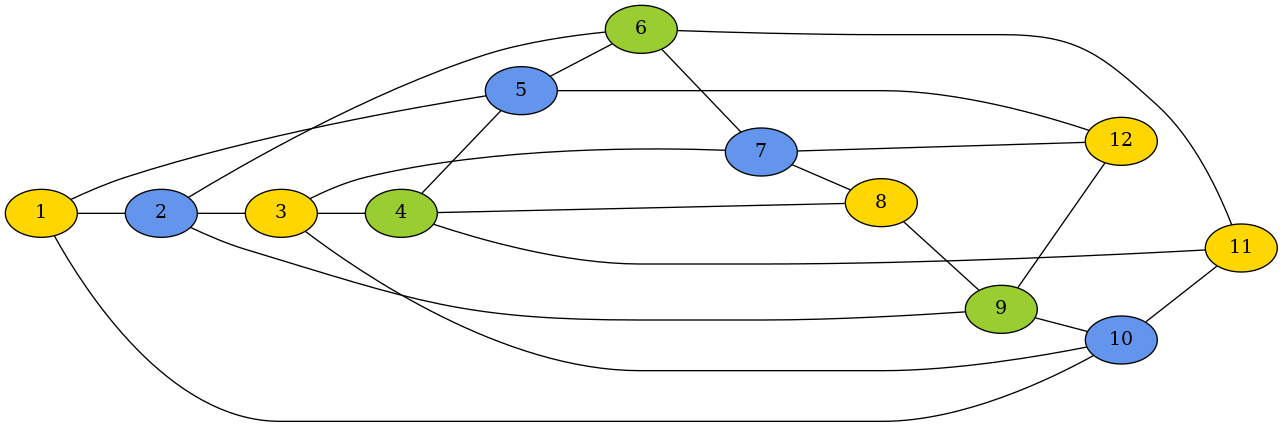

In [55]:
sol = {12: 0, 11: 0, 10: 1, 9: -1, 8: 0, 7: 1, 
      6: -1, 5: 1, 4: -1, 3: 0, 2: 1, 1: 0}
colors = {
-1: "yellowgreen",\
 0: "gold",\
 1: "cornflowerblue",\
 2: "mediumpurple",\
}

g, edge = gv.graph('color'), {}
gv.setv(g, 'rankdir', 'LR')
for vs in graph:
    a = gv.node(g, str(vs[0]))
    gv.setv(a, 'style', 'filled')
    gv.setv(a, 'fillcolor', colors[sol[vs[0]]])
    if vs[0] not in edge: edge[vs[0]] = a
    for v in vs[1:]:
        if v not in edge: edge[v] = gv.node(g, str(v))
        gv.edge(a, edge[v])

for v in (11, 12):
    a = edge[v]
    gv.setv(a, 'style', 'filled')
    gv.setv(a, 'fillcolor', colors[sol[v]])

gv.layout(g, 'dot')
gv.render(g, "png", 'color.png')
Image('color.png')

Polynomial GCDs by syzygies
https://ieeexplore.ieee.org/document/7829593

In [56]:
Monom.cmp = Monom.POTlex
var = ['x']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
for i, g in enumerate(fun):
    globals()[g] = Poly(Monom(pos=i))    
test = Janet()
res = ginvMin((\
(2 + 5*x + x**2)*(-1 + x - 3*x**2 + x**3),\
(2 + 5*x + x**2)*(-2 - 4*x - 4*x**2 + x**3),\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong <= x**5
x**5
prolong <= x**5
x**5
x**4
prolong <= x**5
x**5
x**3
prolong <= x**4
x**4
x**2
prolong <= x**3
x**3
prolongAll
crit1: 0
crit1: 0
 time: 0.00 sec
    count: 1
reduction: 10
       HP: 2


In [57]:
for w in test.GB():
    print(w.poly)

x**2 + x*5 + 2


In [58]:
Monom.cmp = Monom.POTlex
var = ['x']
fun = 'a, b, c'.split(', ')
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
for i, g in enumerate(fun):
    globals()[g] = Poly(Monom(pos=i))    
test = Forest(Janet)
res = ginvMin((\
(2 + 5*x + x**2)*(-1 + x - 3*x**2 + x**3)*a + b,\
(2 + 5*x + x**2)*(-2 - 4*x - 4*x**2 + x**3)*a + c,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong <= a*x**5
a*x**5
prolong <= a*x**5
a*x**5
a*x**4
prolong <= a*x**5
a*x**5
a*x**3
prolong <= a*x**4
a*x**4
a*x**2
prolong <= a*x**3
a*x**3
b*x**3
prolongAll
crit1: 0
crit1: 0
 time: 0.00 sec
    count: 2
reduction: 10
       HP: s + 6


In [59]:
for w in test.GB():
    print(w.poly)

a*x**2*59 + a*x*295 + a*118 + b*x**2*-4 + b*x*15 + b*-27 + c*x**2*4 + c*x*-11 + c*16
b*x**3*-1 + b*x**2*4 + b*x*-4 + b*-2 + c*x**3 + c*x**2*-3 + c*x + c*-1


In [60]:
a, b, c, x = sympy.symbols('a, b, c, x')
p = a*x**2*59 + a*x*295 + a*118 + b*x**2*-4 + b*x*15 + b*-27 + c*x**2*4 + c*x*-11 + c*16
p.collect([a, b, c])

In [61]:
p.coeff(a).factor()

In [62]:
(b*x**3*-1 + b*x**2*4 + b*x*-4 + b*-2 + c*x**3 + c*x**2*-3 + c*x + c*-1).collect([a, b, c])

In [63]:
Monom.cmp = Monom.POTlex
var = ['x', 'y']
fun = 'a, b, c'.split(', ')
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
for i, g in enumerate(fun):
    globals()[g] = Poly(Monom(pos=i))    
test = Forest(Janet)
res = ginvMin((\
(2 + x + y - 3*x*y + x**3*y + y**2)*(x**2*y + x**3*y + x*y**4)*a + b,\
(1 - 2*x*y**2 + 3*x**2*y**2 - 2*y**3)*(x**2*y + x**3*y + x*y**4)*a + c,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong <= a*x**5*y**3
a*x**5*y**3
prolong <= a*x**6*y**2
a*x**6*y**2
prolongAll
a*x**6*y**3
a*x**4*y**4
prolongAll
a*x**5*y**4
a*x**5*y**2
prolong <= a*x**5*y**3
a*x**5*y**3
a*x**5*y
prolong <= a*x**5*y**2
a*x**5*y**2
a*x**4*y**3
prolong <= a*x**4*y**4
a*x**4*y**4
a*x**4*y**2
prolong <= a*x**4*y**3
a*x**4*y**3
a*x**4*y
prolong <= a*x**4*y**2
a*x**4*y**2
a*x**3*y**10
prolongAll
a*x**4*y**10
a*x**5*y
b*x**2*y**5
prolong <= b*x**2*y**6
b*x**2*y**6
b*x**2*y**4
prolong <= b*x**2*y**5
b*x**2*y**5
b*x**2*y**3
prolong <= b*x**2*y**4
b*x**2*y**4
a*x**6*y
prolong <= a*x**6*y**2
a*x**6*y**2
b*x**2*y**2
prolong <= b*x**2*y**3
b*x**2*y**3
prolongAll
crit1: 0
crit1: 0
 time: 0.33 sec
    count: 5
reduction: 109
       HP: s^2/2 + 19s/2 + 6


In [64]:
for w in test.GB():
    print(w.poly)

a*x**3*y**10*-8 + a*x**3*y**9*63 + a*x**3*y**8*-98 + a*x**3*y**7*179 + a*x**3*y**6*218 + a*x**3*y**5*-39 + a*x**3*y**4*8 + a*x**3*y**3*9 + a*x**3*y**2*-6 + a*x**3*y*-1 + a*x**2*y**10*-8 + a*x**2*y**9*63 + a*x**2*y**8*-98 + a*x**2*y**7*179 + a*x**2*y**6*218 + a*x**2*y**5*-39 + a*x**2*y**4*8 + a*x**2*y**3*9 + a*x**2*y**2*-6 + a*x**2*y*-1 + a*x*y**13*-8 + a*x*y**12*63 + a*x*y**11*-98 + a*x*y**10*179 + a*x*y**9*218 + a*x*y**8*-39 + a*x*y**7*8 + a*x*y**6*9 + a*x*y**5*-6 + a*x*y**4*-1 + b*x*y**6*-18 + b*x*y**5*69 + b*x*y**4*-27 + b*x*y**3*-9 + b*y**6*3 + b*y**5*73 + b*y**4*36 + b*y**3*-12 + c*x**2*y**5*6 + c*x**2*y**4*-23 + c*x**2*y**3*9 + c*x**2*y**2*3 + c*x*y**5*-5 + c*x*y**4*-9 + c*x*y**3*-18 + c*x*y**2*2 + c*y**6*4 + c*y**5*-30 + c*y**4*87 + c*y**3*-34 + c*y**2*-9 + c*y*6 + c
a*x**4*y*6892355 + a*x**3*y**9*-35784768 + a*x**3*y**8*288157760 + a*x**3*y**7*-490603503 + a*x**3*y**6*895810361 + a*x**3*y**5*806508859 + a*x**3*y**4*-296967770 + a*x**3*y**3*126023568 + a*x**3*y**2*30839477 + a*x

In [65]:
a, b, c, x, y = sympy.symbols('a, b, c, x, y')
p = b*x**2*y**2*3 + b*x*y**2*2 + b*y**3*-2 + b*-1 + c*x**3*y*-1 + c*x*y*3 + c*x*-1 + c*y**2*-1 + c*y*-1 + c*-2
p.collect([a, b, c])

In [66]:
(((2 + x + y - 3*x*y + x**3*y + y**2)*(x**2*y + x**3*y + x*y**4))\
 .expand()/p.coeff(c)).cancel()

https://www.johndcook.com/blog/2017/05/13/grobner-bases/

In [67]:
l, x, y, z = sympy.symbols('l, x, y, z')
s = x**2 + y**2 + z**2 - 1
p = x**3 + 2*x*y*z - z**2
lst = [s]
for v in var[1:]:
    lst.append(p.diff(v) - l*s.diff(v))
lst

prolong <= x**2
x**2
prolong <= l*y
l*y
prolongAll
l*x**2
prolongAll
l*x*y
prolongAll
prolongAll
crit1: 1
crit1: 0
 time: 0.00 sec
    count: 4
reduction: 3
       HP: 2s^2 + 2s + 1


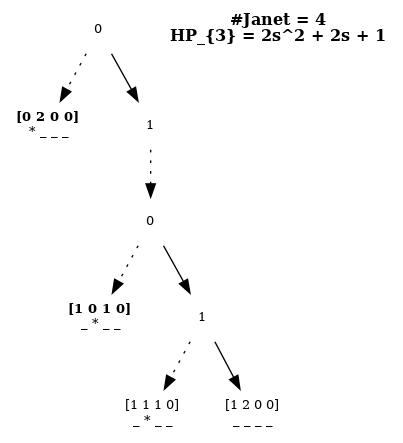

In [68]:
Monom.cmp = Monom.POTlex
var = ['l', 'x', 'y', 'z']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvMin(\
[eval(str(p)) for p in lst], \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [69]:
for w in test.GB():
    print(w.poly)

x**2 + y**2 + z**2 + -1
l*y*-1 + x*z


In [70]:
z = sympy.Symbol('z')
sympy.factor(z**7*-1152 + z**5*1763 + z**3*-655 + z*44)

prolong <= x
x
prolong <= x**3
x**3
y**9
prolongAll
prolongAll
crit1: 1
crit1: 0
 time: 0.01 sec
    count: 2
reduction: 12
       HP: 9s - 27


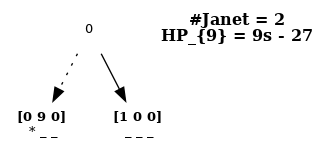

In [72]:
Monom.cmp = Monom.TOPlex
var = ['x', 'y', 'z']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
# res = ginvBlockLow((
res = ginvMin((
x**3 - y**2 + z - 1,
y**3 - z**2 + x - 2), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [73]:
for w in test:
    print(w.poly)

y**9*-1 + y**6*z**2*3 + y**6*6 + y**3*z**4*-3 + y**3*z**2*-12 + y**3*-12 + y**2*-1 + z**6 + z**4*6 + z**2*12 + z + 7
x + y**3 + z**2*-1 + -2
